# **Decision Tree Classifier**

Documentation Sci-kit Learn sur les decision trees : https://scikit-learn.org/stable/modules/tree.html

## Arbres de Décision (DT)

Les arbres de décision (DTs) sont une méthode d'apprentissage supervisé utilisée pour la classification et la régression. L'objectif est de créer un modèle qui prédit la valeur d'une variable cible en apprenant des règles de décision simples à partir des caractéristiques des données.

Plus l'arbre est profond, plus les règles de décision sont complexes et plus le modèle est ajusté.

![Decision Tree](https://scikit-learn.org/stable/_images/iris.svg)

# Avantages et inconvénients des arbres de décision

## Avantages

- **Faciles à comprendre et à interpréter.** Les arbres peuvent être visualisés.
- **Peu de préparation des données requise.** D'autres techniques nécessitent souvent une normalisation des données, la création de variables fictives et la suppression des valeurs manquantes. Certains arbres et algorithmes prennent en charge les valeurs manquantes.
- **Coût logarithmique en fonction du nombre de points de données utilisés pour l'entraînement.** Cela rend leur utilisation efficace.
- **Capables de traiter des données numériques et catégorielles.** Toutefois, l'implémentation de `scikit-learn` ne prend actuellement pas en charge les variables catégorielles. D'autres techniques sont généralement spécialisées dans un seul type de variable.
- **Gèrent les problèmes multi-sorties.**
- **Utilisent un modèle boîte blanche.** Si une situation donnée est observable dans un modèle, son explication est facilement compréhensible via la logique booléenne. À l'inverse, un modèle boîte noire (ex. : réseau de neurones) est plus difficile à interpréter.
- **Validation possible via des tests statistiques.** Cela permet d'évaluer la fiabilité du modèle.
- **Performants même si leurs hypothèses sont partiellement violées par le modèle réel ayant généré les données.**

## Inconvénients

- **Risque de sur-ajustement (overfitting).** Les arbres de décision peuvent devenir trop complexes et ne pas bien généraliser les données. Des techniques comme l'élagage (pruning), la définition d'un nombre minimal d'échantillons par feuille ou la limitation de la profondeur de l'arbre sont nécessaires pour éviter ce problème.
- **Sensibilité aux variations des données.** De légères modifications des données peuvent entraîner la génération d'un arbre complètement différent. L'utilisation d'ensembles d'arbres (ensemble learning) atténue ce problème.
- **Prédictions discontinues et non lisses.** Les arbres de décision fournissent des approximations par morceaux constants, ce qui les rend peu adaptés à l'extrapolation.
- **Apprentissage d'un arbre de décision optimal est un problème NP-complet.** Les algorithmes pratiques reposent donc sur des heuristiques comme l'algorithme glouton, qui prend des décisions localement optimales à chaque nœud. Il n'y a donc pas de garantie d'obtenir l'arbre globalement optimal. Cela peut être atténué en utilisant des ensembles d'arbres où les échantillons et les caractéristiques sont sélectionnés aléatoirement avec remise.
- **Difficulté à apprendre certains concepts.** Les arbres de décision peinent à exprimer des problèmes comme XOR, la parité ou les multiplexeurs.
- **Risque de biais si certaines classes dominent.** Il est recommandé d'équilibrer le jeu de données avant d'entraîner un arbre de décision.

# 1. Importer les librairies

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
import matplotlib.pyplot as plt # visualisation des données
import numpy as np # algèbre linéaire
import pandas as pd  # traitement des données (ex: lecture de fichiers CSV)
import seaborn as sns # visualisation des données
import sklearn # apprentissage automatique

# 2. Importer le jeu de données

In [6]:
# importer le jeu de données iris avec sklearn.datasets
iris = load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Pour référence, voici des images des trois espèces de fleurs :

![https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

# 3. Jeu de données vers DataFrame Pandas
Pandas Documentation : https://pandas.pydata.org/docs/reference/frame.html

In [10]:
# Mettre iris dans un dataframe pandas avec la variable cible (que nous essaierons de prédire) comme dernière colonne
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
display(df_iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
# 10 premières valeurs du jeu de données
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# 4. Analyse exploratoire des données

In [17]:
# Forme du jeu de données (nb de lignes et de colonnes)
display(df_iris.shape)
# Nom des colonnes
display(df_iris.columns)

(150, 5)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [19]:
# Informations sur le DataFrame du jeu de données
display(df_iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


None

In [21]:
# Description du jeu de données Iris (moyenne, écart-type, min, max, quartiles)
display(df_iris.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Distribution de fréquence des valeurs dans les variables catégorielles

In [31]:
# Names of the target values
display(iris.target_names)

# Names of the IRIS functions
display(iris.keys())

# Count of each target value
display(df_iris["target"].value_counts())

# Comme ci-dessus mais en pourcentage
display(df_iris["target"].value_counts(normalize=True))


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

target
0    50
1    50
2    50
Name: count, dtype: int64

target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

### Valeurs manquantes dans les variables

In [35]:
# Missing values
display(df_iris.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Correlation between variables

In [39]:
# Correlation matrix between all the features
display(df_iris.corr(method='pearson'))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


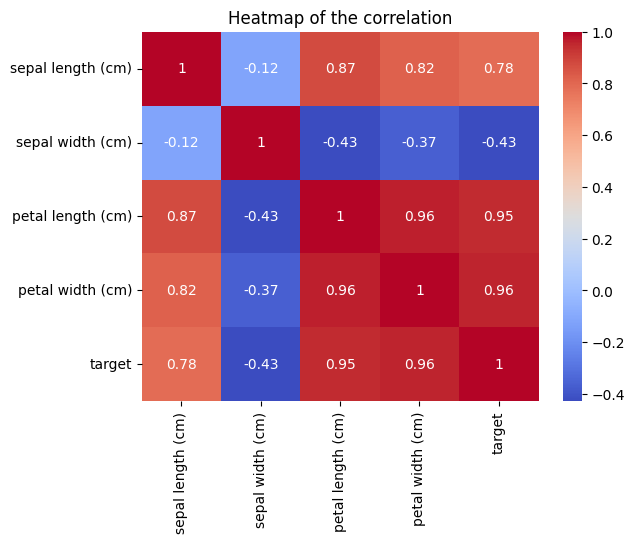

In [46]:
# Heatmap of the correlation matrix using seaborn https://seaborn.pydata.org/generated/seaborn.heatmap.html 
plt.title("Heatmap of the correlation")
sns.heatmap(df_iris.corr(), annot=True, cmap='coolwarm')
plt.show()

In [50]:
# afficher les variables les plus corrélées avec la variable cible (valeur absolue)
display(df_iris.corr()['target'].abs().sort_values(ascending=False))

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)     0.426658
Name: target, dtype: float64

### Visualizing the data

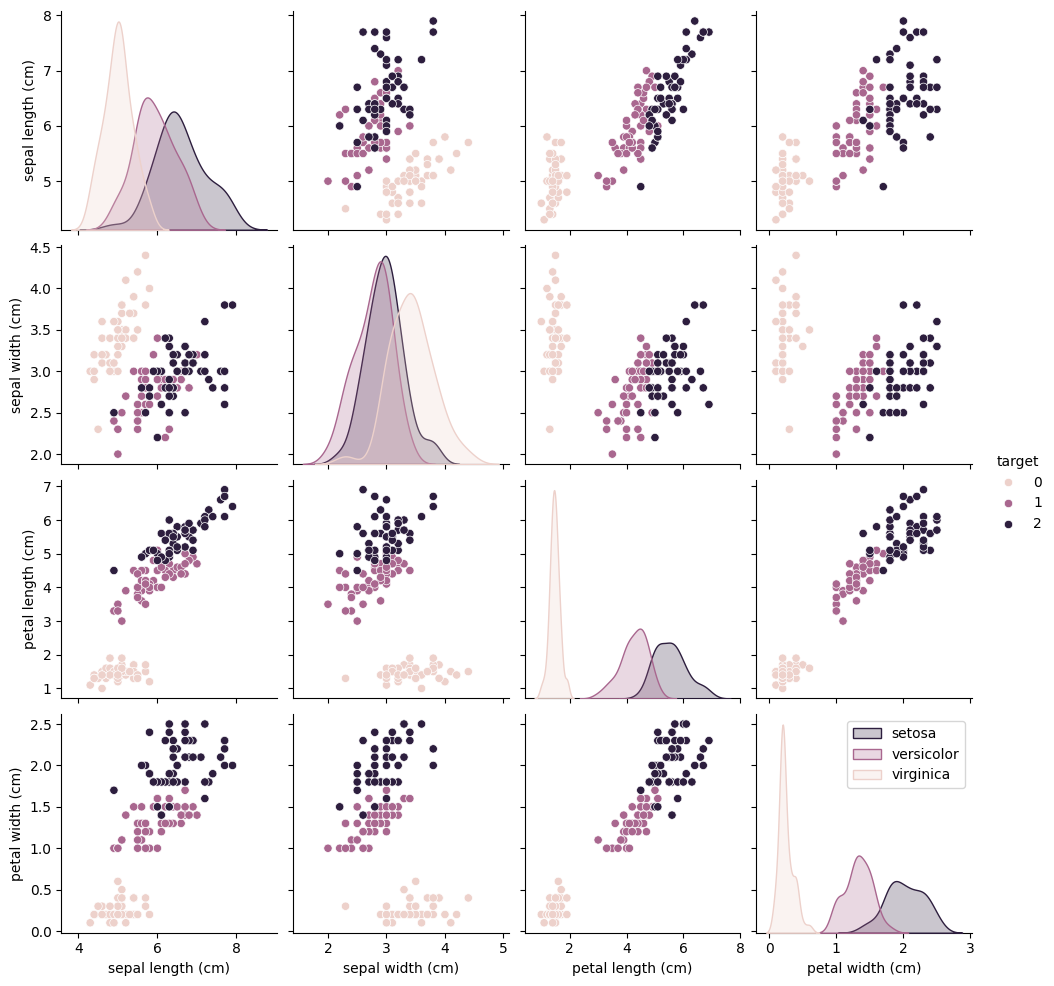

In [54]:
# Plot the pairwise relations in the iris dataset
sns.pairplot(df_iris, hue='target')
plt.legend(iris.target_names)
plt.show()

# 5. Declare features vector and target variable

In [55]:
# X is the feature set and y is the target variable
X = df_iris.drop(['target'], axis=1)
y = df_iris['target']

# 6. Split data into separate training and test sets

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [69]:
# Vérifier les formes de chaque sous-ensemble
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [73]:
# Compter les valeurs uniques dans chacun des sous-ensembles
print(y_train.value_counts())
print(y_test.value_counts())

target
0    40
2    40
1    40
Name: count, dtype: int64
target
0    10
2    10
1    10
Name: count, dtype: int64


# 7. Feature Engineering - Data Encoding

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

In [74]:
# check data types in X_train
X_train.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

# 8. Decision Tree Classifier with criterion gini index

---

In [119]:
# instantiate the DecisionTreeClassifier model with criterion gini index
model_dt = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)

# fit the model aka train the model on X_train
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Prédire les résultats de l'ensemble de test avec le critère d'indice de Gini

In [113]:
y_pred = model_dt.predict(X_test)
print("Prédictions du modèle sur le dataset Test :\n", y_pred)
print("Valeurs réelles du modèle sur le dataset Test :\n", y_test.values)

Prédictions du modèle sur le dataset Test :
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]
Valeurs réelles du modèle sur le dataset Test :
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


### Vérifier le score de précision avec le critère d'indice de Gini en utilisant sklearn.metrics

In [114]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667


Ici, **y_test** sont les vraies étiquettes de classe et **y_pred** sont les étiquettes de classe prédites dans l'ensemble de test.

### Vérifier le surapprentissage et le sous-apprentissage

In [115]:
y_pred_train = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)

# compare training and test accuracies 
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9833333333333333
0.9666666666666667


### Visualisation de l'arbre de décision

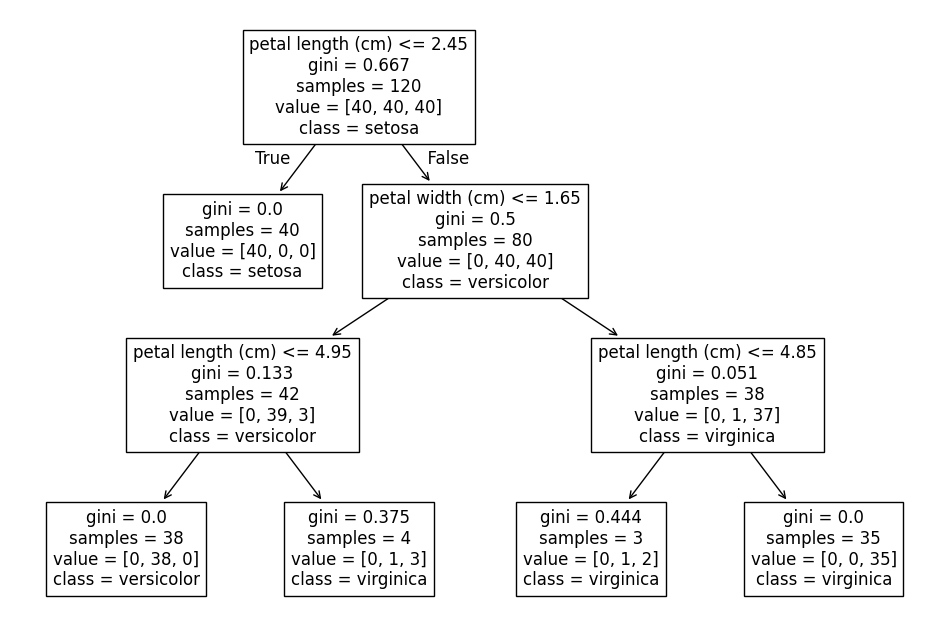

In [101]:
plt.figure(figsize=(12,8))
tree.plot_tree(model_dt.fit(X_train, y_train), feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

### Visualiser les arbres de décision avec graphviz

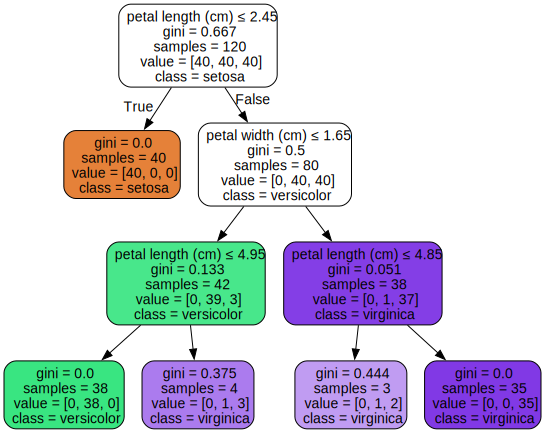

In [116]:
dot_data = tree.export_graphviz(
    model_dt,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph

# 9. Decision Tree Classifier with criterion entropy

---



In [118]:
# instantiate the DecisionTreeClassifier model with criterion entropy index
model_dt_entro = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)

# fit the model aka train the model on X_train
model_dt_entro.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

### Prédire les résultats de l'ensemble de test avec le critère d'entropie

In [120]:
y_pred_entro = model_dt_entro.predict(X_test)
print("Prédictions du modèle sur le dataset Test :\n", y_pred_entro)
print("Valeurs réelles du modèle sur le dataset Test :\n", y_test.values)


Prédictions du modèle sur le dataset Test :
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]
Valeurs réelles du modèle sur le dataset Test :
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


### Vérifier les scores de précision avec le critère d'entropie

In [121]:
print(accuracy_score(y_test, y_pred_entro))


0.9666666666666667


### Vérifier le surapprentissage et le sous-apprentissage

In [122]:
#compare training and test accuracies 
y_pred_train_entro = model_dt_entro.predict(X_train)
y_pred_test_entro = model_dt_entro.predict(X_test)

# compare training and test accuracies
print(accuracy_score(y_train, y_pred_train_entro))
print(accuracy_score(y_test, y_pred_test_entro))

0.9833333333333333
0.9666666666666667


### Visualiser l'arbre de décision

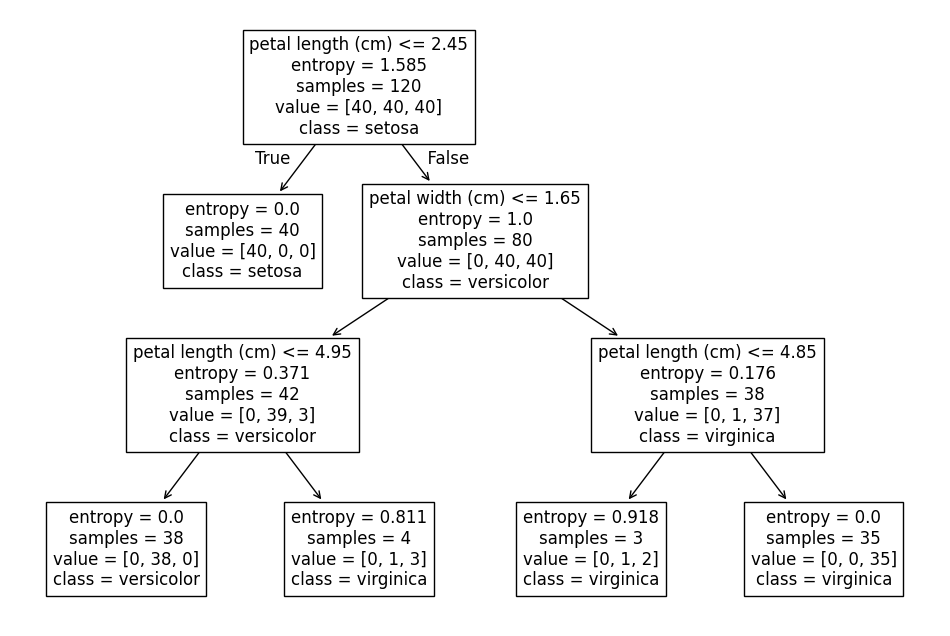

In [124]:
plt.figure(figsize=(12, 8))
tree.plot_tree(
    model_dt_entro.fit(X_train, y_train),
    feature_names=iris.feature_names,
    class_names=iris.target_names,
)
plt.show()


### Visualiser l'arbre de décision with graphviz

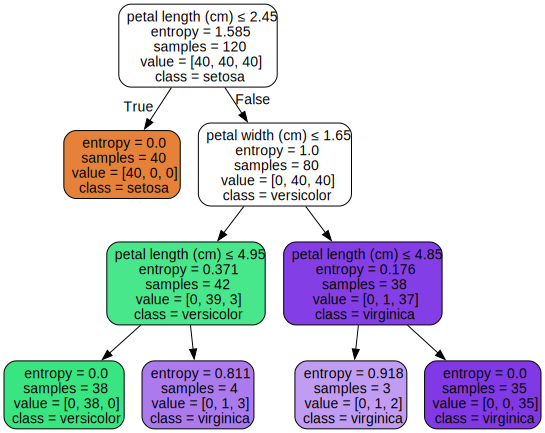

In [123]:
dot_data = tree.export_graphviz(
    model_dt_entro,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph


# 10. Confusion matrix


Une matrice de confusion aide à résumer les performances d'un algorithme de classification. Elle donne une image claire de la performance d'un modèle de classification ainsi que des types d'erreurs produites par celui-ci. <br>
Elle donne un résumé des prédictions correctes et incorrectes réparties par catégorie. 


Quatre types de résultats sont possibles lors de l'évaluation des performances d'un modèle de classification :


**Vrais Positifs (VP)** – Nous prédisons qu'une observation appartient à une certaine classe *x* et l'observation appartient effectivement à cette classe *x*.


**Vrais Négatifs (VN)** – Nous prédisons qu'une observation n'appartient pas à une certaine classe *x* et l'observation n'appartient effectivement pas à cette classe *x*.


**Faux Positifs (FP)** – Nous prédisons qu'une observation appartient à une certaine classe *x* mais l'observation **n'appartient pas** à cette classe *x*. Ce type d'erreur est appelé erreur de Type I.



**Faux Négatifs (FN)** – Nous prédisons qu'une observation n'appartient pas à une certaine classe *x* mais l'observation **appartient effectivement** à cette classe *x*. C'est une erreur très grave appelée erreur de Type II.



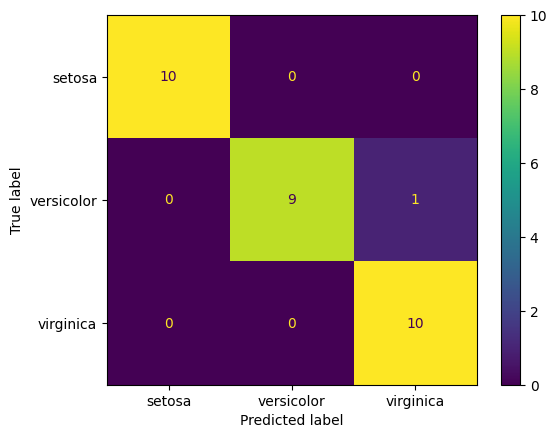

In [128]:
# Print the Confusion Matrix for GINI and identify the four pieces

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
cm_display.plot()
plt.show()

In [ ]:
# Print the Confusion Matrix for Entropy and identify the four pieces


# 11. Cross Validation

In [138]:
# Cross validation score for GINI with 5 different splits
score_ginis = cross_val_score(model_dt, X, y, cv=10)
print(score_ginis)
print(score_ginis.mean())
print(score_ginis.std())

# Cross validation score for Entropy with 5 different splits
score_entro = cross_val_score(model_dt_entro, X, y, cv=10)
print(score_entro.mean())
print(score_entro.std())


[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
0.96
0.03265986323710903
0.96
0.03265986323710903


# 12. Classification Report

**Le rapport de classification** est un autre moyen d'évaluer les performances du modèle de classification. Il affiche les scores de **précision**, **rappel**, **f1** et **support** pour le modèle. J'ai décrit ces termes plus loin.

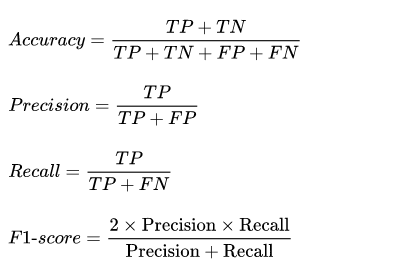


In [139]:
# Rapport de classification for GINI
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [140]:
# Rapport de classification for Entropy
print(classification_report(y_test, y_pred_entro, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# 13. Decision Boundaries

The two most correlated features for the classification are the petal length and the petal width whereas the two least correlated features are the sepal length and the sepal width.

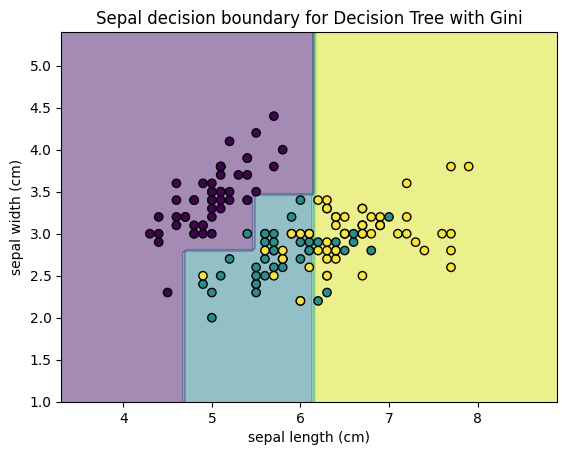

In [141]:
# Print decision boundary for decision tree with gini index

# Decision boundary for sepal length and sepal width only
X = iris.data[:, :2]
sepal_classifier = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
sepal_classifier.fit(X, iris.target)

disp = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(
    sepal_classifier,
    X,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.title("Sepal decision boundary for Decision Tree with Gini")
plt.show()


In [ ]:
# Decision boundary for petal length and petal width only


Visually, we can see that using only the petals attributes, the classification is better than using only the sepal attributes.

# Principal Component Analysis

Principal Component Analysis is a dimensionality reduction technique. It is used to reduce the number of features in a dataset. It is used to reduce the complexity of the model and to reduce the training time. It is also used to visualise high dimensional data. <br>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

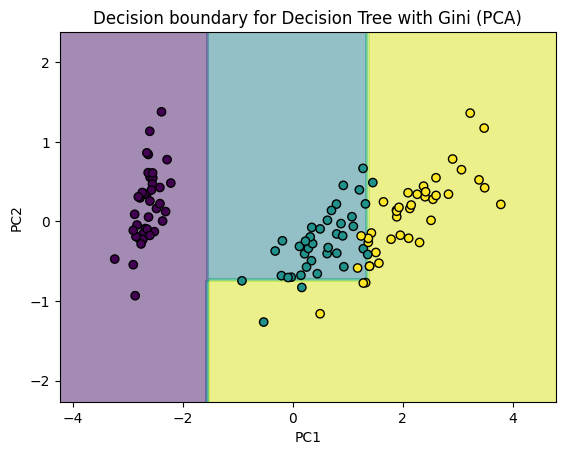

In [142]:
pca = PCA(n_components=2)  # 2 principal components for 2D plot
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

pca_classifier = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
pca_classifier.fit(X_train_pca, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    pca_classifier, X_train_pca, xlabel="PC1", ylabel="PC2", alpha=0.5
)
disp.ax_.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor="k")
plt.title("Decision boundary for Decision Tree with Gini (PCA)")
plt.show()

# Références : 
1. https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#13.-Decision-Tree-Classifier-with-criterion-gini-index-
2. https://scikit-learn.org/
3. https://www.datacamp.com/tutorial/machine-learning-in-r
4. https://www.datacamp.com/tutorial/decision-tree-classification-python 
5. https://www.tutorialexample.com/an-introduction-to-accuracy-precision-recall-f1-score-in-machine-learning-machine-learning-tutorial/

# Gini et Entropie dans les Arbres de Décision

Dans les arbres de décision, **Gini** et **Entropie** sont des métriques utilisées pour mesurer l'impureté (ou le désordre) d'un ensemble de données à un nœud donné. Elles aident l'algorithme à décider comment diviser les données.

---

## **1. Impureté de Gini**
- Mesure la probabilité qu'un élément choisi au hasard soit mal classé s'il est étiqueté selon la distribution des classes dans le nœud.
- Formule :
  $$
  Gini = 1 - \sum_{i=1}^{C} p_i^2
  $$
  où :
  -  $C$ est le nombre de classes,
  -  $p_i$ est la proportion de la classe $i$ dans le nœud.

- **Plage de valeurs** : 0 (nœud pur) à 0.5 (impureté maximale pour un problème binaire équilibré).
- **Exemple** :
  - Si un nœud contient 80 % de la classe A et 20 % de la classe B :
    $$
    Gini = 1 - (0.8^2 + 0.2^2) = 1 - (0.64 + 0.04) = 0.32
    $$

---

## **2. Entropie (Gain d'Information)**
- Mesure l'imprévisibilité de l'ensemble de données à un nœud, basé sur la théorie de l'information.
- Formule :
  $$
  Entropie = -\sum_{i=1}^{C} p_i \log_2 p_i
  $$
  où :
  -  $C$ est le nombre de classes,
  -  $p_i$ est la proportion de la classe $i$ dans le nœud.

- **Plage de valeurs** : 0 (nœud pur) à 1 (désordre maximal pour un problème binaire équilibré).
- **Exemple** :
  - Si un nœud contient 80 % de la classe A et 20 % de la classe B :
    $$
    Entropie = -(0.8 \log_2 0.8 + 0.2 \log_2 0.2)
    $$
    $$
    = -(0.8 \times -0.32 + 0.2 \times -2.32) = 0.72
    $$

---

## **Comparaison entre Gini et Entropie**

| Critère        | Impureté de Gini | Entropie |
|---------------|----------------|---------|
| **Concept**   | Mesure la probabilité de mauvaise classification | Mesure le désordre de l'information |
| **Calcul**    | Plus rapide (pas de logarithmes) | Plus lent (utilise des logarithmes) |
| **Préférence de division** | Privilégie une pureté de classe plus élevée | Favorise des divisions plus équilibrées (si proches) |
| **Impact sur les arbres de décision** | Peut conduire à des arbres légèrement différents | Peut produire des arbres plus profonds |

En pratique, **Gini est préféré dans les arbres CART (Classification and Regression Trees) car il est plus rapide à calculer**, tandis que **l'Entropie est utilisée dans ID3, C4.5 et d'autres algorithmes d'arbres de décision**. Toutefois, les résultats obtenus avec ces deux critères sont souvent similaires.